# Decision Trees

In this notebook, let us look at [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning) using python `sklearn` module. Like other machine learning algorithms, *Decision Trees* can perform both classification and regression tasks. They are very powerful algorithms, capable of fitting complex datasets. 

# Training and Visualizing a Decision Tree

To understand Decision Trees, let's build one and take a look at how it makes predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Plot properties.
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.titlesize'] = 20

In [3]:
# Load data
iris = datasets.load_iris()

In [4]:
# Lets look at the dataframe.
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Use features petal length and width ONLY.
X = iris.data[:, 2:]
y = iris.target

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Fit a model.
trainer = DecisionTreeClassifier(max_depth=2)
trainer.fit(X,y)

DecisionTreeClassifier(max_depth=2)

Visualize the trained Decision Tree by first using the `export_graphviz()` method to output a graph definition file called **iris_tree.dot**.

[Text(186.0, 251.66666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(93.0, 151.0, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(279.0, 151.0, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(186.0, 50.333333333333314, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(372.0, 50.333333333333314, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

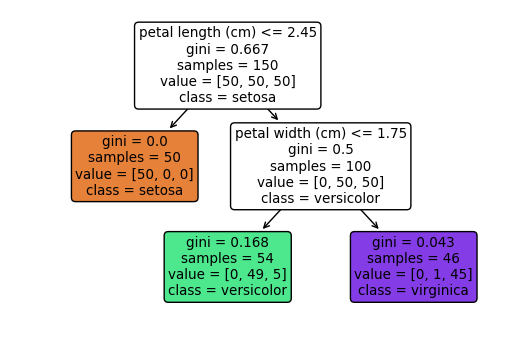

In [8]:
from sklearn import tree # sklearn-version >= 0.21

tree.plot_tree(trainer, max_depth=2, 
                   feature_names=iris.feature_names[2:],
                   class_names=iris.target_names,
                   rounded=True,
                   filled=True)

TODO: Add code cell using `export_graphviz'.

## Making predictions

For prediction, we start at the *root node* (depth=0, at the top): this node asks whether the flower's petal length is smaller than 2.45 cm. If it is, then you move down to the root's left child node (depth=1,left). In this case, it is a *leaf node*, so it directly predicts the class as `setosa`. Otherwise, you travel the root's right child (depth=1,right). This node asks whether the petal width is <= 1.75 cm. If the answer is *yes*, the classifier predicts `versicolor` as predicted class, else it predicts `virginica` as the predicted class.

Some advantages of *Decision Trees* are as follows:
- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- Able to handle both numerical and categorical data.
- Possible to validate a model using statistical tests. 


Some disadvantages of *Decision Trees* are as follows:
- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

A tree-node's *samples* attribute counts how many training instances it applies to. Its *value* attribute tells how many training instances of each class this node applies to. Finally, the *gini* attribute meatures its *impurity*, a node is **"pure"** if all training instances it applies to belong to the same class. 

The goal of their learning algorithms is always to find the best split for each node of the tree. The goodness of a split is measured by the *gini impurity* score. Formally, a *gini impurity* score is defined as:

$$
G_i = 1 - \underset{k}\sum p_{ik}^{2}
$$

where $p_{ik}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ tree-node.

For the root node (depth=0), the *gini impurity* measure can be computed as follows: (assume `setosa` = 1,`versicolor` = 2, `virginica` = 3)

$$
\begin{align*}
& p_{0,1} = p_{0,2} = p_{0,3}  = \frac{50}{150} \\
\implies G_0 &= 1 - \left({\frac{50}{150}}\right)^2 - \left({\frac{50}{150}}\right)^2 - \left({\frac{50}{150}}\right)^2 \\
\implies &= 1 - \left({\frac{50}{150}} \right)^2 \times 3 \\
\implies &= 1 - \frac{1}{3} = \frac{2}{3} = 0.667
\end{align*}
$$

In [9]:
# Step size in the mesh. For visualization purpose.
stepSize = .1

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize),
                         np.arange(y_min, y_max, stepSize))

In [10]:
Z = trainer.predict(np.c_[xx.ravel(), yy.ravel()])

In [11]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'cyan', 'darkblue'])

Text(0.5, 1.0, '3-Class Classification using a DecisionTreeClassifer with max_depth:2')

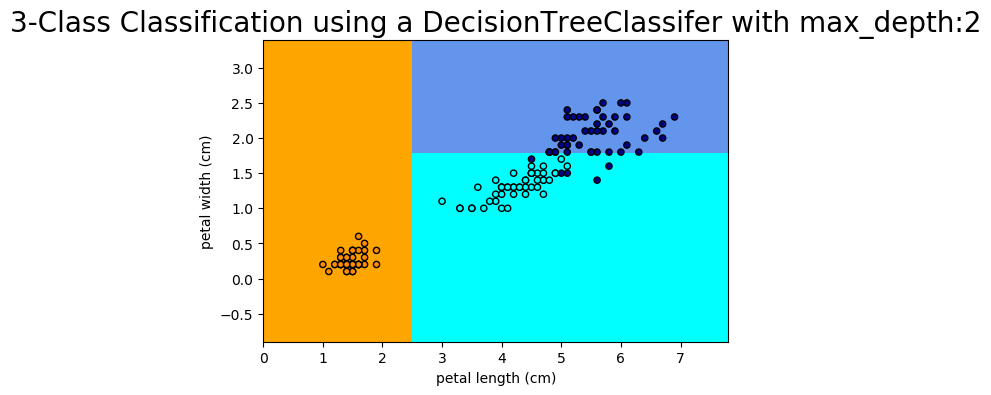

In [14]:
# Put the decision boundary into a color plot
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Next, add the training points.
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolors='k',s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'3-Class Classification using a DecisionTreeClassifer with max_depth:2')